In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

tweets1 = pd.read_csv("pdp.csv", names=['created_at', 'tweet', 'user']) # uu pdp
tweets2 = pd.read_csv("perlindungandatapribadi.csv", names=['created_at', 'tweet', 'user']) # perlindungan data pribadi

In [3]:
tweets = pd.concat([tweets1, tweets2], ignore_index=True)
tweets

,created_at,tweet,user
0,2022-10-28 10:54:54+00:00,b'@hyang_wisnu @kemkominfo @jokowi @PlateJohnn...,Om Udien Official
1,2022-10-28 10:54:38+00:00,"b'Menurut Menkominfo, Johnny G. Plate, UU PDP ...",Om Udien Official
2,2022-10-28 10:43:47+00:00,b'Perihal UU PDP yang telah disahkan pada 20 S...,Ngalap Berkah Nitizen
3,2022-10-28 10:33:05+00:00,"b'@hyang_wisnu Jadi, harus ada upaya untuk mem...",Udien Marbot Official
4,2022-10-28 10:23:08+00:00,b'@hyang_wisnu @kemkominfo @Aryprasetyo85 @Pla...,Om Udien Official
...,...,...,...
375,2022-10-19 15:11:27+00:00,b'Perlunya Perlindungan Data Pribadi Pada Tran...,Tiada Hari Tanpa Berita
376,2022-10-19 15:10:37+00:00,b'UU Nomor 27 Tahun 2022 Tentang Perlindungan ...,Cekhukum.com
377,2022-10-19 14:10:29+00:00,b'Perlunya Perlindungan Data Pribadi Pada Tran...,Tiada Hari Tanpa Berita
378,2022-10-19 13:02:10+00:00,b'Sudah resmi dan dapat nomor..\n\nUndang Unda...,M. Fatahillah Akbar


## Preprocessing

In [4]:
# Considering certain columns for dropping duplicates
tweets = tweets.drop_duplicates(subset=['tweet'])
tweets

,created_at,tweet,user
0,2022-10-28 10:54:54+00:00,b'@hyang_wisnu @kemkominfo @jokowi @PlateJohnn...,Om Udien Official
1,2022-10-28 10:54:38+00:00,"b'Menurut Menkominfo, Johnny G. Plate, UU PDP ...",Om Udien Official
2,2022-10-28 10:43:47+00:00,b'Perihal UU PDP yang telah disahkan pada 20 S...,Ngalap Berkah Nitizen
3,2022-10-28 10:33:05+00:00,"b'@hyang_wisnu Jadi, harus ada upaya untuk mem...",Udien Marbot Official
4,2022-10-28 10:23:08+00:00,b'@hyang_wisnu @kemkominfo @Aryprasetyo85 @Pla...,Om Udien Official
...,...,...,...
374,2022-10-19 15:35:16+00:00,b'Perlunya Perlindungan Data Pribadi Pada Tran...,DOSIS 4
375,2022-10-19 15:11:27+00:00,b'Perlunya Perlindungan Data Pribadi Pada Tran...,Tiada Hari Tanpa Berita
376,2022-10-19 15:10:37+00:00,b'UU Nomor 27 Tahun 2022 Tentang Perlindungan ...,Cekhukum.com
377,2022-10-19 14:10:29+00:00,b'Perlunya Perlindungan Data Pribadi Pada Tran...,Tiada Hari Tanpa Berita


In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [8]:
import re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def cleaningText(text):
    text = re.sub(r"b'", '', text) # Menghapus b'
    text = text.replace('\n', ' ') # Menghapus baris baru
    text = re.sub(r'@[A-Za-z0–9]+', '', text) # Menghapus @mentions
    text = re.sub(r'#[A-Za-z0–9]+', '', text) # Menghapus '#' hash tag
    text = re.sub(r'RT[\s]+', '', text) # Menghapus RT
#     text = re.sub(r'https?\/\/\S+', '', text) # Menghapus hyperlink
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
#     text = re.sub(r'_', '', text) # Menghapus '_' underscore
#     text = re.sub(r':', '', text) # Menghapus ':' 
    # https://www.adamsmith.haus/python/answers/how-to-remove-single-quotes-from-a-string-in-python
#     text = re.sub(r"'", '', text) # Menghapus ' --> quotes
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

In [9]:
tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
tweets.drop(['tweet'], axis = 1, inplace = True)

tweets['text_preprocessed'] = tweets['text_clean'].apply(tokenizingText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(filteringText)
tweets['text_preprocessed'] = tweets['text_preprocessed'].apply(stemmingText)

tweets.drop_duplicates(subset = 'text_clean', inplace = True)

tweets.to_csv(r'tweets_data_clean.csv', index = False, header = True, index_label = None)
tweets

/var/folders/lv/b309wc915pg67vwgh83lg2z00000gn/T/ipykernel_1290/1623109265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text_clean'] = tweets['tweet'].apply(cleaningText)
/var/folders/lv/b309wc915pg67vwgh83lg2z00000gn/T/ipykernel_1290/1623109265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text_clean'] = tweets['text_clean'].apply(casefoldingText)
/var/folders/lv/b309wc915pg67vwgh83lg2z00000gn/T/ipykernel_1290/1623109265.py:3: SettingWithCopyWarning: 
A value is trying to be se

,created_at,user,text_clean,text_preprocessed
0,2022-10-28 10:54:54+00:00,Om Udien Official,wisnu uu pdp akan memperkuat kepercayaan da...,"[wisnu, uu, pdp, kuat, percaya, aku, pimpin, i..."
1,2022-10-28 10:54:38+00:00,Om Udien Official,menurut menkominfo johnny g plate uu pdp juga ...,"[menkominfo, johnny, g, plate, uu, pdp, hadir,..."
2,2022-10-28 10:43:47+00:00,Ngalap Berkah Nitizen,perihal uu pdp yang telah disahkan pada septe...,"[perihal, uu, pdp, sah, september, rapat, pari..."
3,2022-10-28 10:33:05+00:00,Udien Marbot Official,wisnu jadi harus ada upaya untuk memastikan ke...,"[wisnu, upaya, aman, sibernya, jaga, atur, und..."
4,2022-10-28 10:23:08+00:00,Om Udien Official,wisnu avp usai pengesahan uu perlindun...,"[wisnu, avp, kesah, uu, lindung, data, pribadi..."
...,...,...,...,...
372,2022-10-19 16:18:01+00:00,pantau,gpp bang dia mau ngetes uu perlindungan data p...,"[gpp, bang, ngetes, uu, lindung, data, pribadi..."
373,2022-10-19 16:12:57+00:00,Selvy Susanto,uu perlindungan data pribadi disahkan bintang ...,"[uu, lindung, data, pribadi, sah, bintang, emo..."
374,2022-10-19 15:35:16+00:00,DOSIS 4,perlunya perlindungan data pribadi pada transa...,"[lindung, data, pribadi, transaksi, online]"
376,2022-10-19 15:10:37+00:00,Cekhukum.com,uu nomor tahun tentang perlindungan dataxcxa...,"[uu, nomor, lindung, dataxcxapribadi]"


In [10]:
tweets = pd.read_csv('tweets_data_clean.csv')

for i, text in enumerate(tweets['text_preprocessed']):
    tweets['text_preprocessed'][i] = tweets['text_preprocessed'][i].replace("'", "")\
                                            .replace(',', '').replace(']', '').replace('[', '')
    
    list_words = []
    for word in tweets['text_preprocessed'][i].split():
        list_words.append(word)
        
    tweets['text_preprocessed'][i] = list_words
    
tweets

,created_at,user,text_clean,text_preprocessed
0,2022-10-28 10:54:54+00:00,Om Udien Official,wisnu uu pdp akan memperkuat kepercayaan da...,"[wisnu, uu, pdp, kuat, percaya, aku, pimpin, i..."
1,2022-10-28 10:54:38+00:00,Om Udien Official,menurut menkominfo johnny g plate uu pdp juga ...,"[menkominfo, johnny, g, plate, uu, pdp, hadir,..."
2,2022-10-28 10:43:47+00:00,Ngalap Berkah Nitizen,perihal uu pdp yang telah disahkan pada septe...,"[perihal, uu, pdp, sah, september, rapat, pari..."
3,2022-10-28 10:33:05+00:00,Udien Marbot Official,wisnu jadi harus ada upaya untuk memastikan ke...,"[wisnu, upaya, aman, sibernya, jaga, atur, und..."
4,2022-10-28 10:23:08+00:00,Om Udien Official,wisnu avp usai pengesahan uu perlindun...,"[wisnu, avp, kesah, uu, lindung, data, pribadi..."
...,...,...,...,...
292,2022-10-19 16:18:01+00:00,pantau,gpp bang dia mau ngetes uu perlindungan data p...,"[gpp, bang, ngetes, uu, lindung, data, pribadi..."
293,2022-10-19 16:12:57+00:00,Selvy Susanto,uu perlindungan data pribadi disahkan bintang ...,"[uu, lindung, data, pribadi, sah, bintang, emo..."
294,2022-10-19 15:35:16+00:00,DOSIS 4,perlunya perlindungan data pribadi pada transa...,"[lindung, data, pribadi, transaksi, online]"
295,2022-10-19 15:10:37+00:00,Cekhukum.com,uu nomor tahun tentang perlindungan dataxcxa...,"[uu, nomor, lindung, dataxcxapribadi]"


## Determine Sentiment Polarity of Tweets with Indonesia Sentiment Lexicon

In [11]:
lexicon_positive = dict()

import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
    
# -------------------------------------------------

lexicon_negative = dict()

import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# -------------------------------------------------

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    
    polarity = ''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [12]:
results = tweets['text_preprocessed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))

tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

tweets

positive    158
negative    107
neutral      32
Name: polarity, dtype: int64


,created_at,user,text_clean,text_preprocessed,polarity_score,polarity
0,2022-10-28 10:54:54+00:00,Om Udien Official,wisnu uu pdp akan memperkuat kepercayaan da...,"[wisnu, uu, pdp, kuat, percaya, aku, pimpin, i...",1,positive
1,2022-10-28 10:54:38+00:00,Om Udien Official,menurut menkominfo johnny g plate uu pdp juga ...,"[menkominfo, johnny, g, plate, uu, pdp, hadir,...",0,neutral
2,2022-10-28 10:43:47+00:00,Ngalap Berkah Nitizen,perihal uu pdp yang telah disahkan pada septe...,"[perihal, uu, pdp, sah, september, rapat, pari...",-1,negative
3,2022-10-28 10:33:05+00:00,Udien Marbot Official,wisnu jadi harus ada upaya untuk memastikan ke...,"[wisnu, upaya, aman, sibernya, jaga, atur, und...",-5,negative
4,2022-10-28 10:23:08+00:00,Om Udien Official,wisnu avp usai pengesahan uu perlindun...,"[wisnu, avp, kesah, uu, lindung, data, pribadi...",4,positive
...,...,...,...,...,...,...
292,2022-10-19 16:18:01+00:00,pantau,gpp bang dia mau ngetes uu perlindungan data p...,"[gpp, bang, ngetes, uu, lindung, data, pribadi...",9,positive
293,2022-10-19 16:12:57+00:00,Selvy Susanto,uu perlindungan data pribadi disahkan bintang ...,"[uu, lindung, data, pribadi, sah, bintang, emo...",2,positive
294,2022-10-19 15:35:16+00:00,DOSIS 4,perlunya perlindungan data pribadi pada transa...,"[lindung, data, pribadi, transaksi, online]",5,positive
295,2022-10-19 15:10:37+00:00,Cekhukum.com,uu nomor tahun tentang perlindungan dataxcxa...,"[uu, nomor, lindung, dataxcxapribadi]",4,positive


## Analysis and Visualization
### Comparison Sentiment Polarity on Tweets Data

In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


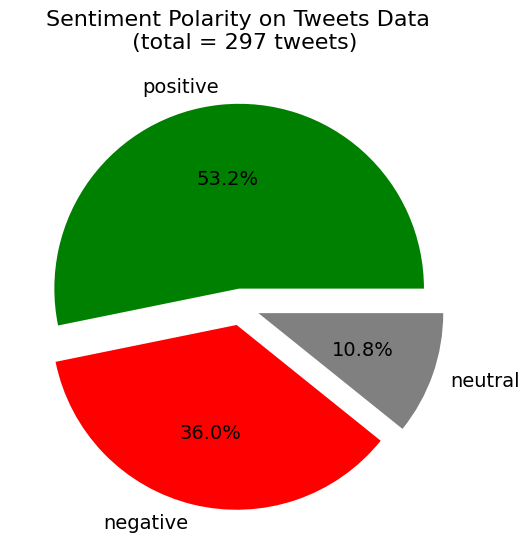

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in tweets['polarity'].value_counts()]
labels = list(tweets['polarity'].value_counts().index)
explode = (0.1, 0.1, 0.1)
ax.pie(x = sizes, labels = labels, colors = ['green', 'red', 'grey'], autopct = '%1.1f%%', explode = explode, textprops = {'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data \n (total = 297 tweets)', fontsize = 16, pad = 20)
plt.show()

## Top 10 Positive and Negative Tweet Sentiments

In [15]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(
    by = 'polarity_score', ascending = False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,lulusan ilmu hukum didorong lirik bidang ham mengenali lokasi penugasan menjadi hakim tanggung jawab negara tuntaskan pelanggaran ham berat turut dibahas hukumonlinen,10,positive
2,penetapan lembaga perlindungan data pribadi oleh presiden telah dilakukan semoga amanah,10,positive
3,data pribadi nasabah tibatiba diubah secara sepihak oleh pihak bank bolehkah bank melakukan perubahan data sepihak yuk simak perlindungan hukum data pribadi nasabah dan langkah hukum yang bisa ditempuh oleh nasabahn,9,positive
4,adanya uu pdp ini kata semuel juga mendorong pengembangan ekosistem untuk memperbanyak talenta baru dalam bidang pdp dan juga memperkuat rekognisi terhadap kepempimpinan indonesia dalam tata kelola data global kedepannyan,9,positive
5,gpp bang dia mau ngetes uu perlindungan data pribadi yg baru rilis ya mudahan aja masuk jeruji,9,positive
6,ada informasi baru lagi nih soal undangundang pelindungan data pribadi uu pdp tepatnya pada senin oktober presiden jokowi resmi mengesahkan dan mengundangkan uu no tentang pdp,9,positive
7,nanti ada di situ semua ya jangan sampai mendahului nanti di aturan itu ada konsultasi publiknyan nn,8,positive
8,menkominfo johnny g plate pemerintah sedang menyiapkan perpres dan aturan turunan uu pdp dan mengundang partisipasi masyarakat dengan menggelar konsultasi publik dalam penyusunannyann n nn,8,positive
9,kominfo tengah kaji rencana pembentukan lembaga pengawas perlindungan dataxcxapribadi,8,positive
10,lembanga perlindungan data pribadi akan di tetapkan presiden,7,positive


In [16]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = tweets[tweets['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(
    by = 'polarity_score', ascending = True)[0:10].reset_index(drop = True)
negative_tweets.index += 1
negative_tweets[0:10]

,text_clean,polarity_score,polarity
1,hadirnya uu pdp dapat mempersempit penyalahgunaan data pribadi kebocoran data pribadi hingga jual beli data pribadi yang seringkali disebabkan oleh serangan siber human error kegagalan sistem hingga tidak perdulinya terhadap kewajiban regulasin,-35,negative
2,uu pdp ini juga mengatur terkait ketentuan pidana pelanggar hukum pasal ayat menyebutkan ketentuan pidana bagi yang dengan sengaja dan melawan hukum memperoleh atau mengumpulkan data pribadi yang bukan miliknyan n n,-21,negative
3,oth dwia yaa benarxfxfxxd perlindungan data pribadi dibutuhkan untuk dapat menghindari ancaman pelecehan seksual perundungan online hingga kekerasan berbasis gender online kbgo,-17,negative
4,pasal dengan sengaja membuat data pribadi palsu atau memalsukan data pribadi dengan maksud untuk menguntungkan diri sendiri atau orang lain yang dapat mengakibatkan kerugian bagi orang lain pidana penjara enam tahun atau pidana denda rp uu pdp,-16,negative
5,aduan laporan bantuan data pribadi kekerasan gender berbasis online revenge porn serangan digital hack whatsapp ancaman gangguan akses internet bantuan hukum layanan hukum perlindungan,-16,negative
6,ada pasal karetnya nggak nih kabarnya spil nama lengkap sama jenis kelamin bisa kena uu pdp,-14,negative
7,budidjaja international lawyers bil mengumumkan pengangkatan terhadap dua senior associate presiden diminta bergerak cepat mengambil alih untuk membenahi penegakan hukum dan tantangan implementasi uu pdpn,-14,negative
8,pemerintah terus berkomitmen untuk melindungi data pribadi masyarakat guna menghindari penyalahgunaan atau kebocoran data yang dilakukan pihakpihak yang tidak bertanggung jawab melalui berbagai cara salah satunya dengan penerapa uu pdp,-13,negative
9,ilham saya kurang paham soal eksklusifitas slik ojk cm uu pdp bolehin data publik dikelola bareng swasta jgn kan data marketplace aj bisa jd pengendali data sekaligus mungutin pajak,-12,negative
10,spill nama lengkap org lain jenis kelamin dan agama sudah bisa kena uu pdp mantap nih semoga nggak dijadikan pasal karet,-11,negative


## WordCloud

In [17]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


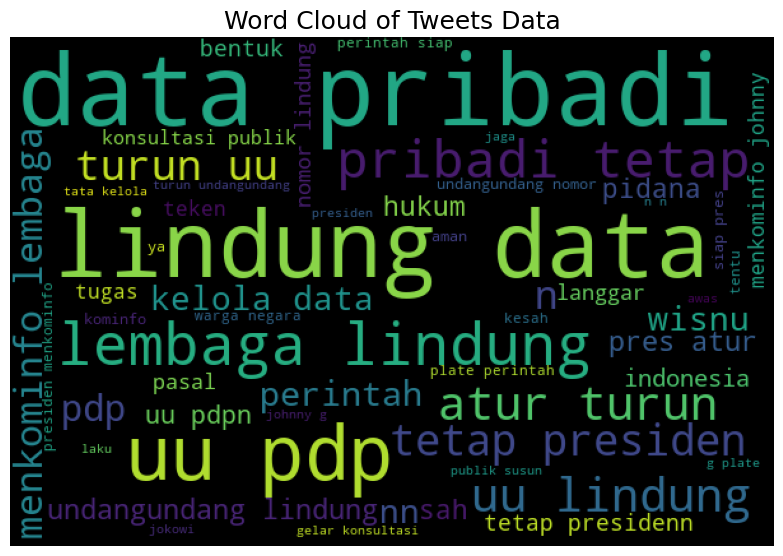

In [18]:
from wordcloud import WordCloud

list_words = ''
for tweet in tweets['text_preprocessed']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, 
                      background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad = 0)
ax.axis('off')
plt.show()

In [19]:
def words_with_sentiment(text):
    positive_words = []
    negative_words = []
    
    for word in text:
        score_pos = 0
        score_neg = 0
    
        if (word in lexicon_positive):
            score_pos = lexicon_positive[word]
        if (word in lexicon_negative):
            score_neg = lexicon_negative[word]

        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
        
    return positive_words, negative_words

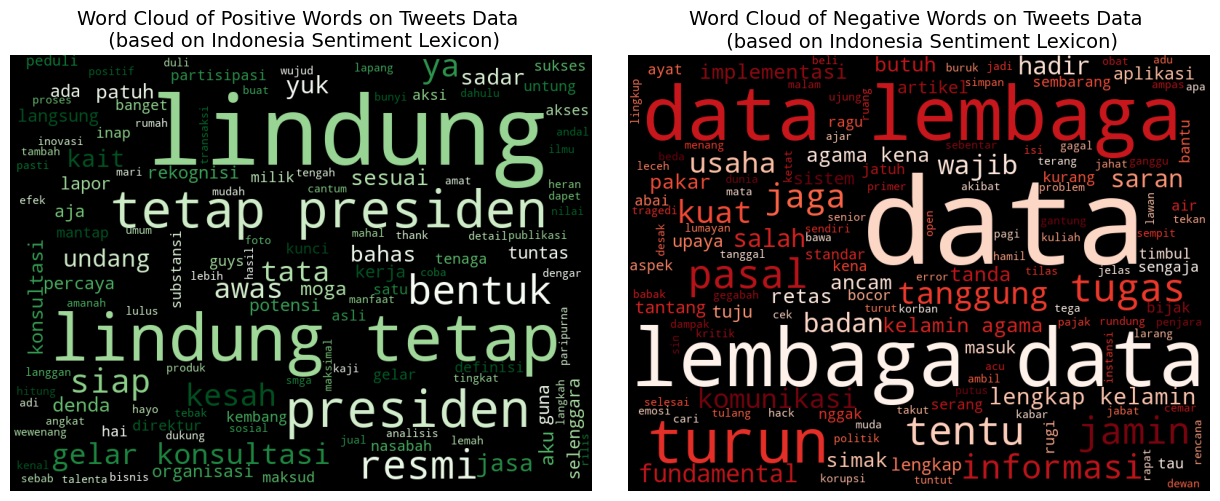

In [20]:
sentiment_words = tweets['text_preprocessed'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2, figsize = (12, 10))

list_words_positive = ''
for row_word in positive_words:
    for word in row_word:
        list_words_positive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black',
                              colormap = 'Greens', min_font_size = 10).generate(list_words_positive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad = 0)
ax[0].axis('off')

list_words_negative = ''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black',
                              colormap = 'Reds', min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad = 0)
ax[1].axis('off')

plt.show()

## Undersampling the Imbalance Dataset


In [21]:
negative = len(tweets.loc[tweets['polarity'] == 'negative'])
neutral = len(tweets.loc[tweets['polarity'] == 'neutral'])
positive = len(tweets.loc[tweets['polarity'] == 'positive'])

print(negative)
print(neutral)
print(positive)

107
32
158


In [22]:
import numpy as np
np.random.seed(10)

remove_n = 51

tweets2 = tweets.loc[tweets['polarity'] == 'positive']

drop_indices = np.random.choice(tweets2.index, remove_n, replace=False)
df_subset = tweets2.drop(drop_indices)

In [23]:
tweets3 = tweets.loc[tweets['polarity'] == 'neutral']
tweets4 = tweets.loc[tweets['polarity'] == 'negative']

In [24]:
tweets_new = pd.concat([df_subset, tweets3, tweets4], ignore_index=True)
tweets_new

,created_at,user,text_clean,text_preprocessed,polarity_score,polarity
0,2022-10-28 10:54:54+00:00,Om Udien Official,wisnu uu pdp akan memperkuat kepercayaan dan pengakuan terhadap kepemimpinan indonesia dalam tata kelola data global indonesia menjadi negara ke di asean yang punya payung hukum perlindungan data pribadin,"[wisnu, uu, pdp, kuat, percaya, aku, pimpin, indonesia, tata, kelola, data, global, indonesia, negara, asean, payung, hukum, lindung, data, pribadin]",1,positive
1,2022-10-28 09:08:46+00:00,Udien Marbot Official,semuel abrijani pangerapan mengatakan pengesahan undangundang pelindungan data pribadi uu pdp oleh presiden pada oktober lalu menandai era baru dalam tata kelola data pribadi di ranah digital indonesian,"[semuel, abrijani, pangerapan, kesah, undangundang, lindung, data, pribadi, uu, pdp, presiden, oktober, tanda, era, tata, kelola, data, pribadi, ranah, digital, indonesian]",2,positive
2,2022-10-28 09:00:33+00:00,Miwa,wisnu keren setelah uu pdp akan membentuk lembaga otoritas,"[wisnu, keren, uu, pdp, bentuk, lembaga, otoritas]",1,positive
3,2022-10-28 08:58:26+00:00,Raavana,wisnu tegas uu pdp lindungi hak warga negara,"[wisnu, uu, pdp, lindung, hak, warga, negara]",4,positive
4,2022-10-28 08:34:28+00:00,Ary Prasetyo,pengesahan undangundang pelindungan data pribadi uu pdp oleh presiden pada oktober lalu menandai era baru dalam tata kelola data pribadi di ranah digital indonesia n n,"[kesah, undangundang, lindung, data, pribadi, uu, pdp, presiden, oktober, tanda, era, tata, kelola, data, pribadi, ranah, digital, indonesia, n, n]",2,positive
...,...,...,...,...,...,...
241,2022-10-20 03:35:46+00:00,Aelda Prihatiwi,uu perlindungan data pribadi sudah diresmikan jokowi golden ticket ari lasso hamil risol get well soon ten and winwin iko uwais jaemin pagii narnia ronaldo jaki ningning batik air iklan rasa film demag soklin antisep fifa kamis lloris syaifullah heru silent hill,"[uu, lindung, data, pribadi, resmi, jokowi, golden, ticket, ari, lasso, hamil, risol, get, well, soon, ten, and, winwin, iko, uwais, jaemin, pagi, narnia, ronaldo, jaki, ningning, batik, air, iklan, film, demag, soklin, antisep, fifa, kamis, lloris, syaifullah, heru, silent, hill]",-5,negative
242,2022-10-20 00:00:25+00:00,Julia Riyanti Wibowo,jokowi telah resmi menandatangani uu tentang perlindungan data pribadi uu tersebut mendapatkan nomor tahun terdapat pasal dalam uu baru tersebutnn iklan rasa film ronaldo rashford silent hill,"[jokowi, resmi, menandatangani, uu, lindung, data, pribadi, uu, nomor, pasal, uu, tersebutnn, iklan, film, ronaldo, rashford, silent, hill]",-1,negative
243,2022-10-19 18:45:39+00:00,Pradhana Adimukti,keduanya korban doxing btw so problemnya memang perlindungan data kita yang masih kacrut nn nn,"[korban, doxing, btw, so, problem, lindung, data, kacrut, nn, nn]",-7,negative
244,2022-10-19 17:52:30+00:00,Abdi Mulia Lubis,jokowi telah resmi menandatangani uu tentang perlindungan data pribadi uu tersebut mendapatkan nomor tahun terdapat pasal dalam uu baru tersebut,"[jokowi, resmi, menandatangani, uu, lindung, data, pribadi, uu, nomor, pasal, uu]",-1,negative


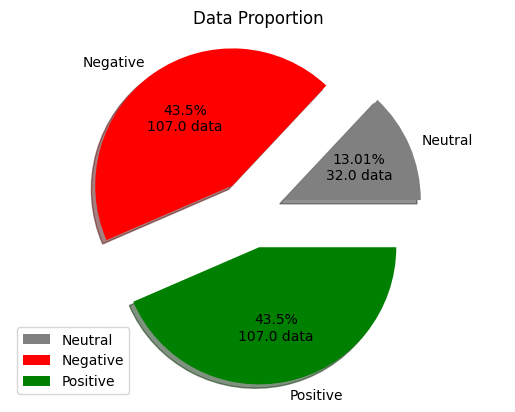

In [25]:
import matplotlib.pyplot as plt
import numpy as np

tweet_neutral = len(tweets_new.loc[tweets_new['polarity'] == 'neutral'])
tweet_negative = len(tweets_new.loc[tweets_new['polarity'] == 'negative'])
tweet_positive = len(tweets_new.loc[tweets_new['polarity'] == 'positive'])

labels = 'Neutral', 'Negative', 'Positive'
sizes = np.array([tweet_neutral, tweet_negative, tweet_positive])
colors = ['grey', 'red', 'green']
explode= (0.25, 0.25, 0.25)
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)

    a=  str(round(val,2))+"%"+'\n'+str(a) +" data"
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, explode=explode,shadow=True)

plt.axis('equal')
plt.title("Data Proportion")
plt.legend()
plt.show()
# plt.savefig("data split.jpg",dpi=300)

In [26]:
tweets_new.to_csv(r'tweets_data_clean.csv', index = False, header = True, index_label = None)